# Star Classifier using ML with Deep Neural Network

## -- Neccessary modules 

In [1]:
import tensorflow as tf 
from tensorflow import keras
from sklearn import preprocessing, model_selection
import numpy as np 
import pandas as pd 

## -- Load data of stars from CSV

In [2]:
df = pd.read_csv('C:\\Users\\User1\\Desktop\\Multi class classifier\\4 class classifier\\Star Classifier\\Star Dataset.csv')

In [3]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3600,0.0029,0.5100,8.69,0,Red,M
1,3129,0.0122,0.3761,11.79,0,Red,M
2,3068,0.0024,0.1700,16.12,0,Red,M
3,3042,0.0005,0.1542,15.60,0,Red,M
4,3134,0.0004,0.1960,13.21,0,Red,M


## -- Converting Data into Numpy Arrays ( For Sake of Convenience)

In [4]:
x = np.array(df.drop(['Star type', 'Star color','Spectral Class'],1))   # Excludes Star type, Star color and Spectral Class
y = np.array(df['Star type'], dtype ='float')                           # Only Star type column
y.shape = (len(y),1)                                                    # Shaping the star type column into a column vector

## -- Splitting Data into Training And Testing Datasets

In [5]:
x_train ,x_test , y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.4) 

## -- Scaling Data for Better Modelling (Only x values)

In [6]:
x_f_train = preprocessing.scale(x_train)
x_f_test = preprocessing.scale(x_test)
y_f_train = y_train
y_f_test = y_test

## -- Using DNN Model for Training Data 

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(300,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(4,activation = tf.nn.softmax))


model.compile(optimizer = tf.train.AdamOptimizer(),
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## -- Fitting Data into Model 

In [8]:
model.fit(x_f_train,y_f_train, epochs = 50)

Epoch 1/50
96/96 [==============================] - 0s 1ms/sample - loss: 1.2956 - acc: 0.5208
Epoch 2/50
96/96 [==============================] - 0s 125us/sample - loss: 1.0342 - acc: 0.8438
Epoch 3/50
96/96 [==============================] - 0s 125us/sample - loss: 0.8313 - acc: 0.8646
Epoch 4/50
96/96 [==============================] - 0s 166us/sample - loss: 0.6654 - acc: 0.8958
Epoch 5/50
96/96 [==============================] - 0s 124us/sample - loss: 0.5345 - acc: 0.9062
Epoch 6/50
96/96 [==============================] - 0s 166us/sample - loss: 0.4259 - acc: 0.9062
Epoch 7/50
96/96 [==============================] - 0s 125us/sample - loss: 0.3449 - acc: 0.9167
Epoch 8/50
96/96 [==============================] - 0s 125us/sample - loss: 0.2797 - acc: 0.9271
Epoch 9/50
96/96 [==============================] - 0s 83us/sample - loss: 0.2299 - acc: 0.9583
Epoch 10/50
96/96 [==============================] - 0s 125us/sample - loss: 0.1885 - acc: 0.9583
Epoch 11/50
96/96 [=============

## -- Checking Trained Data For Overfitting and Underfitting

In [9]:
val_loss,val_acc = model.evaluate(x_f_test,y_f_test)
print("Loss % = {} , Accuracy % = {} ".format(val_loss*100,val_acc*100))

64/64 [==============================] - 0s 874us/sample - loss: 0.0240 - acc: 1.0000
Loss % = 2.4021970108151436 , Accuracy % = 100.0 


## -- Predicting Star Type of Test Data from Trained Data 

In [10]:
# [1,0,0,0] = Red Dwarf
# [0,1,0,0] = White Dwarf
# [0,0,1,0] = Supergiant
# [0,0,0,1] = Hypergiant

arr = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

In [11]:
z = np.round(model.predict(x_f_test))

print('_____________________________________________________')
print("Prediction : P-Class : O-Class ")

c1=c2=c3=c4=c5=c6=c7=c8=0  #counter variables

for i in range(0,len(z)):
    if np.array_equal(z[i],arr[0]):
        print("{}  :  {} :  {}".format(z[i],0,y_test[i]))
        c1+=1
    elif np.array_equal(z[i],arr[1]):
        print("{}  :  {} :  {}".format(z[i],1,y_test[i]))
        c2+=1
    elif np.array_equal(z[i],arr[2]):
        print("{}  :  {} :  {}".format(z[i],2,y_test[i]))
        c3+=1  
    elif np.array_equal(z[i],arr[3]):
        print("{}  :  {} :  {}".format(z[i],3,y_test[i]))
        c4+=1      

print('_____________________________________________________')
print("Predicted NO. of Red Dwarfs = {}".format(c1))
print("Predicted NO. of White Dwarfs = {}".format(c2))
print("Predicted NO. of SuperGiants = {}".format(c3))
print("Predicted NO. of Hypergiants = {}".format(c4))
print("Total tested stars = {}".format(len(z)))

m = y_test

print('_____________________________________________________')

for i in range(0,len(m)):
    if m[i] == 0:
        c5+=1
    elif m[i] == 1 :
        c6+=1 
    elif m[i] == 2 :
        c7+=1 
    elif m[i] == 3 :
        c8+=1 
    


print("Original NO. of Red Dwarfs = {}".format(c5))
print("Original NO. of White Dwarfs = {}".format(c6))
print("Original NO. of SuperGiants = {}".format(c7))
print("Original NO. of Hypergiants = {}".format(c8))
print("Total tested stars = {}".format(len(x_test)))

print('_____________________________________________________')
print('Accuracy = {}%'.format((val_acc*100)))

_____________________________________________________
Prediction : P-Class : O-Class 
[1. 0. 0. 0.]  :  0 :  [0.]
[1. 0. 0. 0.]  :  0 :  [0.]
[0. 0. 0. 1.]  :  3 :  [3.]
[1. 0. 0. 0.]  :  0 :  [0.]
[0. 0. 1. 0.]  :  2 :  [2.]
[1. 0. 0. 0.]  :  0 :  [0.]
[0. 0. 0. 1.]  :  3 :  [3.]
[0. 0. 0. 1.]  :  3 :  [3.]
[0. 0. 0. 1.]  :  3 :  [3.]
[0. 0. 1. 0.]  :  2 :  [2.]
[1. 0. 0. 0.]  :  0 :  [0.]
[0. 1. 0. 0.]  :  1 :  [1.]
[1. 0. 0. 0.]  :  0 :  [0.]
[0. 0. 1. 0.]  :  2 :  [2.]
[1. 0. 0. 0.]  :  0 :  [0.]
[0. 1. 0. 0.]  :  1 :  [1.]
[0. 1. 0. 0.]  :  1 :  [1.]
[0. 0. 1. 0.]  :  2 :  [2.]
[0. 0. 0. 1.]  :  3 :  [3.]
[0. 1. 0. 0.]  :  1 :  [1.]
[1. 0. 0. 0.]  :  0 :  [0.]
[0. 0. 1. 0.]  :  2 :  [2.]
[0. 0. 0. 1.]  :  3 :  [3.]
[0. 1. 0. 0.]  :  1 :  [1.]
[0. 1. 0. 0.]  :  1 :  [1.]
[0. 1. 0. 0.]  :  1 :  [1.]
[0. 1. 0. 0.]  :  1 :  [1.]
[0. 0. 0. 1.]  :  3 :  [3.]
[0. 1. 0. 0.]  :  1 :  [1.]
[0. 0. 0. 1.]  :  3 :  [3.]
[0. 0. 0. 1.]  :  3 :  [3.]
[1. 0. 0. 0.]  :  0 :  [0.]
[1. 0. 0. 0.]  :  

# Data Visualisation 

## -- Importing Matplotlib module for plotting

In [12]:
import matplotlib.pyplot as plt

## -- Plotting Original data of Stars

Total Counted Stars = 160


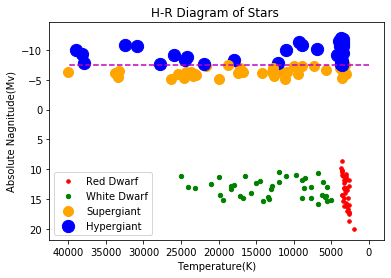

In [13]:
df1 = pd.read_csv('C:\\Users\\User1\\Desktop\\Multi class classifier\\4 class classifier\\My Notebook\\4 class csv.csv')

## data plotting

x1 = np.array(df1.drop(['Star color','Spectral Class'],1))
y1 = np.array(df1['Star type'], dtype ='float')
y1.shape = (len(y1),1)
c1 =0

for i in range(0,len(x1)):
    if x1[i][4] == 0:
        a = plt.scatter(x1[i][0],x1[i][3], s = 50 , c = 'red', marker = '.')
    elif x1[i][4]== 1:
        b = plt.scatter(x1[i][0],x1[i][3],s = 75 , c = 'green',marker = '.')
    elif x1[i][4]== 2:
        c = plt.scatter(x1[i][0],x1[i][3],s = 100 , c = 'orange',marker = 'o')
    elif x1[i][4]== 3:
        d = plt.scatter(x1[i][0],x1[i][3],s = 150 , c = 'blue',marker = 'o')    
    c1+=1


print("Total Counted Stars = {}".format(c1)) 
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Nagnitude(Mv)")
plt.title("H-R Diagram of Stars ")
plt.legend((a,b,c,d),('Red Dwarf','White Dwarf','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

## -- Visualizing Trained Data

Total Trained Stars = 96


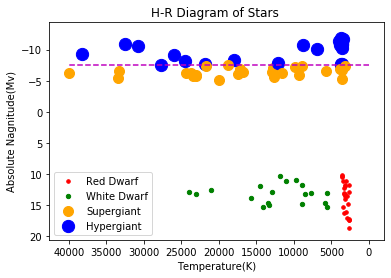

In [14]:
c2=0

for i in range(0,len(y_train)):
    if y_train[i] == 0:
        a = plt.scatter(x_train[i][0],x_train[i][3], s = 50 , c = 'red', marker = '.')
    elif y_train[i]== 1:
        b = plt.scatter(x_train[i][0],x_train[i][3],s = 75 , c = 'green',marker = '.')
    elif y_train[i]== 2:
        c = plt.scatter(x_train[i][0],x_train[i][3],s = 100 , c = 'orange',marker = 'o')
    elif y_train[i]== 3:
        d = plt.scatter(x_train[i][0],x_train[i][3],s = 150 , c = 'blue',marker = 'o')    
    c2+=1


print("Total Trained Stars = {}".format(c2)) 
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Nagnitude(Mv)")
plt.title("H-R Diagram of Stars ")
plt.legend((a,b,c,d),('Red Dwarf','White Dwarf','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

## -- Visualizing Tested Data 

Total Tested Stars = 64


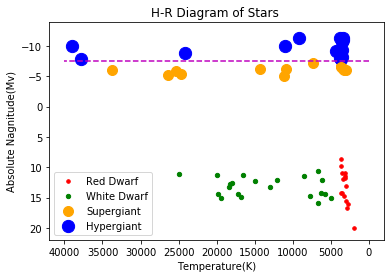

In [15]:
c3=0

for i in range(0,len(y_test)):
    if y_test[i] == 0:
        a = plt.scatter(x_test[i][0],x_test[i][3], s = 50 , c = 'red', marker = '.')
    elif y_test[i]== 1:
        b = plt.scatter(x_test[i][0],x_test[i][3],s = 75 , c = 'green',marker = '.')
    elif y_test[i]== 2:
        c = plt.scatter(x_test[i][0],x_test[i][3],s = 100 , c = 'orange',marker = 'o')
    elif y_test[i]== 3:
        d = plt.scatter(x_test[i][0],x_test[i][3],s = 150 , c = 'blue',marker = 'o')    
    c3+=1


print("Total Tested Stars = {}".format(c3)) 
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Nagnitude(Mv)")
plt.title("H-R Diagram of Stars ")
plt.legend((a,b,c,d),('Red Dwarf','White Dwarf','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

## -- Visualizing Predicted data

Total Predicted Stars = 64


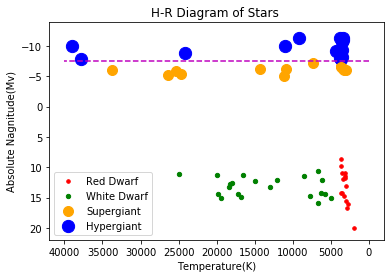

In [16]:
c4 = 0

for i in range(0,len(z)):
    if np.array_equal(z[i],arr[0]):
        a = plt.scatter(x_test[i][0],x_test[i][3], s = 50 , c = 'red', marker = '.')
    elif np.array_equal(z[i],arr[1]):
        b = plt.scatter(x_test[i][0],x_test[i][3],s = 75 , c = 'green',marker = '.')
    elif np.array_equal(z[i],arr[2]):
        c = plt.scatter(x_test[i][0],x_test[i][3],s = 100 , c = 'orange',marker = 'o')
    elif np.array_equal(z[i],arr[3]):
        d = plt.scatter(x_test[i][0],x_test[i][3],s = 150 , c = 'blue',marker = 'o') 
    c4+=1

print("Total Predicted Stars = {}".format(c4)) 
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Nagnitude(Mv)")
plt.title("H-R Diagram of Stars ")
plt.legend((a,b,c,d),('Red Dwarf','White Dwarf','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()
    